# TSP Matrix

In [20]:
#%matplotlib inline
%matplotlib notebook
import numpy as np
import pylab
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import mpld3
seed = 42
np.random.seed(seed=seed)

In [13]:
def gen_param(num):
    path = list(range(num))
    X = np.random.random(num)
    Y = np.random.random(num)
    XY = X + Y * 1j
    return num, path, X, Y, XY

In [14]:
def plot_path(path, edges=False, size=6):
    plt.figure(figsize=(size, size))
    cmap = plt.get_cmap("tab10")
    plt.axis([0,1,0,1], 'equal')
    plt.plot(X[path], Y[path], alpha=0.0)
    plt.scatter(X[0], Y[0], s=80, c='r', marker='o')
    if path:
        for i in range(len(path)-1):
            plt.arrow(X[path[i]], Y[path[i]], 
                      X[path[i+1]]-X[path[i]], Y[path[i+1]]-Y[path[i]], 
                      head_width=0.02, head_length=0.02, length_includes_head=True, 
                      fc=cmap(0), ec=cmap(0))
    if edges:
        for e in edges:
            plt.plot([X[e[0]], X[e[1]]], [Y[e[0]], Y[e[1]]])
    
    for i in range(num):
        plt.text(X[i], Y[i]+0.01, s=i, fontsize=10, color='gray')

<IPython.core.display.Javascript object>


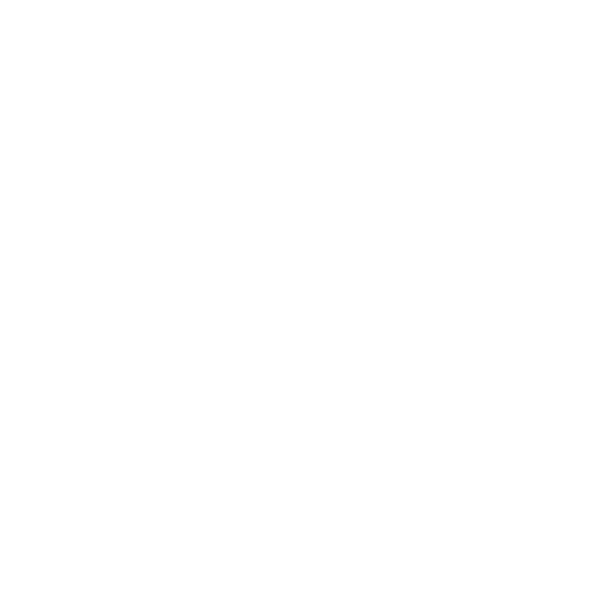

In [15]:
# Generate parameters and Plot initial path
num, path, X, Y, XY = gen_param(10) # the number of nodes
plot_path(path + [0])

In [16]:
dist = {(i, j): abs(XY[i] - XY[j]) for j in path for i in path if i != j}
x = {(i, j): 0 for (i, j) in dist}
len(x)

90

<IPython.core.display.Javascript object>


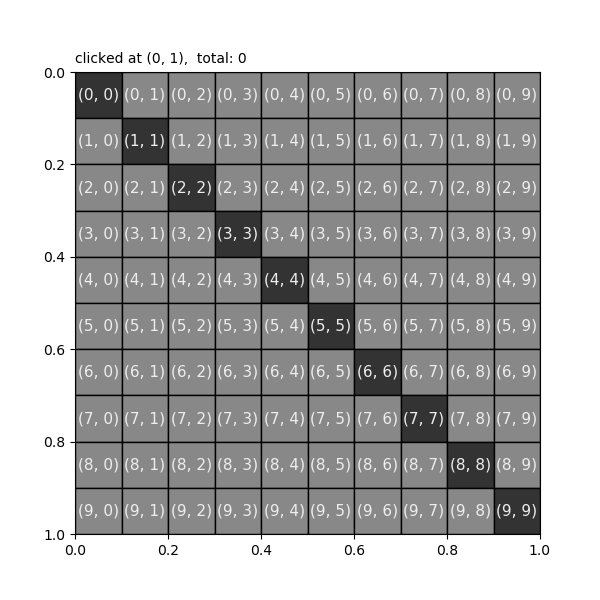

In [23]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
plt.axis([0,1,1,0], 'equal')

sz = 1.0 / num
RECT = [Rectangle((i*sz, j*sz), sz, sz) for j in path for i in path]

CL_ON = '#AA5555'
CL_OFF = '#888888'
CL_NONE = '#333333'
CL_TX = '#eeeeee'

FC = []
for i in path:
    for j in path:
        if i == j:
            FC.append(CL_NONE)
        else:
            FC.append(CL_OFF)

pc = PatchCollection(RECT, facecolor=FC, edgecolor='k')
ax.add_collection(pc)
fz = fig.get_size_inches()[0] / 100
tx = [plt.text(i/num+fz/10, j/num+fz, (j, i), fontsize=11, color=CL_TX) for j in path for i in path]
ED = []

def onclick(event):
    global FC, ED
    i = int(event.ydata * num)
    j = int(event.xdata * num)
    n = j + i * num
    if i != j and FC[n] != CL_NONE:
        if FC[n] == CL_ON:
            FC[n] = CL_OFF
        else:
            FC[n] = CL_ON
    
    if FC[n] == CL_ON:
        FC[i + j * num] = CL_NONE
    elif FC[n] == CL_OFF:
        for u in path:
            for v in path:
                if FC[v + u * num] != CL_ON and u != v:
                      FC[v + u * num] = CL_OFF
    ED = []
    for u in path:
        for v in path:
            if FC[v + u * num] == CL_ON:
                FC[u + v * num] = CL_NONE
                ED.append((u, v))
                for x in path:
                    if FC[v + x * num] != CL_ON and FC[x + u * num] != CL_ON and x != v and u != x:
                        FC[v + x * num] = CL_NONE
                        FC[x + u * num] = CL_NONE
                        
    plt.cla()
    plt.axis([0,1,1,0], 'equal')
    s = 'clicked at ' + str((i, j)) + ',  total: ' + str(len(ED))
    plt.text(0, -0.02, s, fontsize=10)
    pc = PatchCollection(RECT, facecolor=FC, edgecolor='k')
    ax.add_collection(pc)
    tx = [plt.text(v/num+fz/10, u/num+fz, (u, v), fontsize=11, color=CL_TX) for v in path for u in path]
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [19]:
SB = [0]
for _ in range(num):
    for ed in ED:
        if SB[-1] == ed[0] and ed[1] not in SB:
            SB.append(ed[1])

print(len(SB) == num, ':', SB)

False : [0, 1, 6, 3, 2, 7, 8]


In [21]:
mpld3.save_html(fig, 'tsp_matrix.html')

In [ ]:
from matplotlib.collections import PatchCollection

fig = plt.figure(figsize=(6,6))
ax = plt.axes()
plt.axis([0,1,1,0], 'equal')

RECT = [Rectangle((i*sz, j*sz), sz, sz) for j in path for i in path]

CL_ON = '#AA5555'
CL_OFF = '#888888'
CL_NONE = '#333333'
CL_TX = '#bbbbbb'

FC = [CL_OFF] * num * num
for i in range(len(FC)):
    if (i % num) == (i // num):
        FC[i] = CL_NONE

pc = PatchCollection(RECT, facecolor=FC, edgecolor='k')
ax.add_collection(pc)
fz = fig.get_size_inches()[0] / 100
tx = [plt.text(i/num+fz/10, j/num+fz, (j, i), fontsize=11, color=CL_TX) for j in path for i in path]
ED = []

def onclick(event):
    global FC, ED
    i = int(event.ydata * num)
    j = int(event.xdata * num)
    n = j + i * num
    
    if i != j and FC[n] != CL_NONE:
        if FC[n] == CL_OFF:
            FC[n] = CL_ON
        else:
            FC[n] = CL_OFF
    
    if FC[n] == CL_ON:
        FC[i + j * num] = CL_NONE
    elif FC[n] == CL_OFF:
        for f in range(len(FC)):
            if FC[f] != CL_ON and (f % num) != (f // num):
                FC[f] = CL_OFF
    
    ED = []
    for f in range(len(FC)):
        if FC[f] == CL_ON:
            FC[(f // num) + (f % num) * num] = CL_NONE
            ED.append(((f // num), (f % num)))
            for x in path:
                u, v = f // num, f % num
                if FC[v + x * num] != CL_ON and FC[x + u * num] != CL_ON and x != v and u != x:
                    FC[v + x * num] = CL_NONE
                    FC[x + u * num] = CL_NONE
    
    plt.cla()
    plt.axis([0,1,1,0], 'equal')
    s = 'clicked at ' + str((i, j)) + ',  total: ' + str(len(ED))
    plt.text(0, -0.02, s, fontsize=10)
    pc = PatchCollection(RECT, facecolor=FC, edgecolor='k')
    ax.add_collection(pc)
    tx = [plt.text(v/num+fz/10, u/num+fz, (u, v), fontsize=11, color=CL_TX) for v in path for u in path]
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)


In [ ]:
SB = [0]
for _ in range(num):
    for ed in ED:
        if SB[-1] == ed[0] and ed[1] not in SB:
            SB.append(ed[1])

print(len(SB) == num, ':', SB)

In [ ]:
import mpld3